# Data Preprocessing for Coffee Rust Detection

This notebook is used for preprocessing the dataset of coffee leaves, including both healthy and infected samples. The preprocessing steps include loading images, resizing them, and applying data augmentation techniques to enhance the dataset for training. It is just an example of what must be done. This is mainly due to the fact that MobileNetV2 uses 224x244 sized images, and the images on our dataset are actually 128x128.

In [6]:
# Import necessary libraries
import os  # For file and directory operations
import numpy as np  # For numerical operations
import cv2  # For image processing
import matplotlib.pyplot as plt  # For plotting images
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For data augmentation

# Define paths for healthy and infected images
healthy_dir = '../data/healthy'
infected_dir = '../data/infected'

# Function to load images from a directory
def load_images_from_directory(directory):
    images = []  # List to store images
    labels = []  # List to store labels
    for label, category in enumerate(['healthy', 'infected']):  # Loop through categories
        # Enumerate assigns a numerical label to each category:
        # label = 0 for 'healthy'
        # label = 1 for 'infected'
        path = os.path.join(directory, category)  # Get the path for the category
        for img_name in os.listdir(path):  # Loop through image files in the category
            img_path = os.path.join(path, img_name)  # Get the full path of the image
            img = cv2.imread(img_path)  # Read the image
            if img is not None:  # Check if the image was loaded successfully
                img = cv2.resize(img, (224, 224))  # Resize to match MobileNetV2 input size
                images.append(img)  # Add the image to the list
                labels.append(label)  # Add the label to the list
                # Append the numerical label to the labels list:
                # 0 for healthy images
                # 1 for infected images
            else:
                print(f"Warning: Failed to load image {img_path}")  # Print a warning if the image failed to load
    return np.array(images), np.array(labels)  # Return the images and labels as numpy arrays

# Load images
images, labels = load_images_from_directory('../data')  # Load images from the data directory
print(f'Loaded {len(images)} images with labels {np.unique(labels)}, 0 for healthy and 1 for infected')  # Print the number of loaded images and unique labels

Loaded 27319 images with labels [0 1], 0 for healthy and 1 for infected


This part of the code takes the resized images and uses them to increase the dataset. It shows 7 of the new images that now are the perfect size to work with the pre trained model.

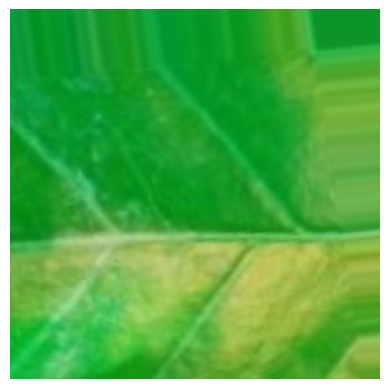

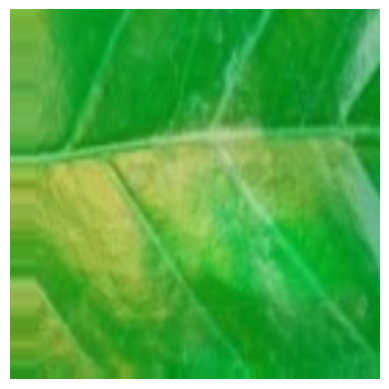

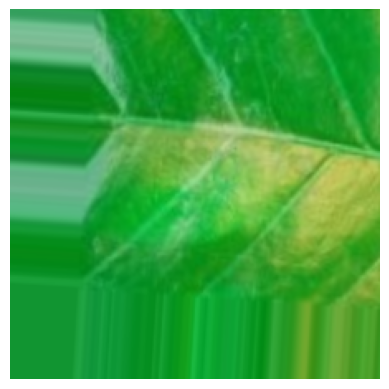

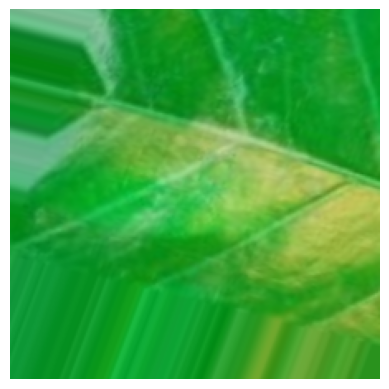

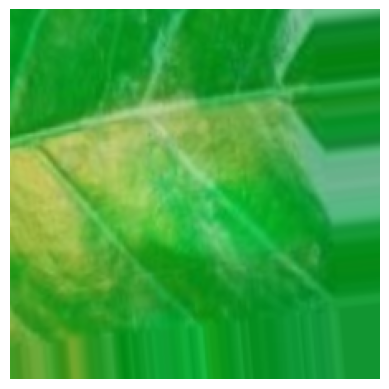

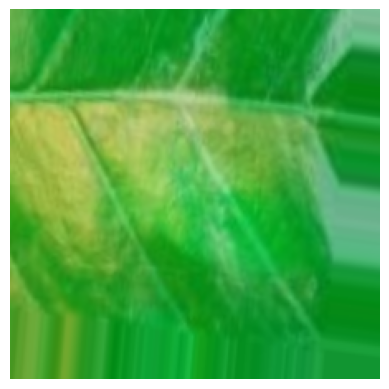

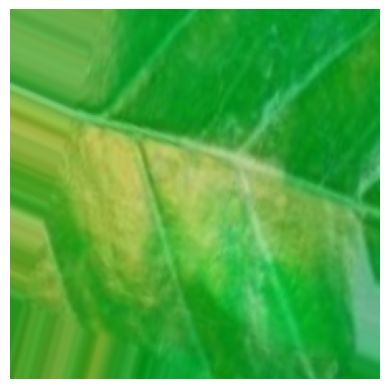

In [7]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,  # Randomly rotate images by 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by 20% of the width
    height_shift_range=0.2,  # Randomly shift images vertically by 20% of the height
    shear_range=0.2,  # Randomly shear images by 20%
    zoom_range=0.2,  # Randomly zoom into images by 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill in missing pixels with the nearest value
)

# Example of using the data generator
sample_image = images[0].reshape((1, 224, 224, 3))  # Reshape the first image for the generator
i = 0  # Initialize a counter
for batch in datagen.flow(sample_image, batch_size=1):  # Generate augmented images
    plt.imshow(batch[0].astype('uint8'))  # Display the augmented image
    plt.axis('off')  # Turn off the axis
    plt.show()  # Show the image
    i += 1  # Increment the counter
    if i > 6:  # Stop after showing 7 augmented images
        break  # Break the loop